In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root='data/', download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 10375376.64it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1806431.65it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 11956645.93it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7750418.54it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [5]:
len(dataset)

60000

In [6]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [9]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


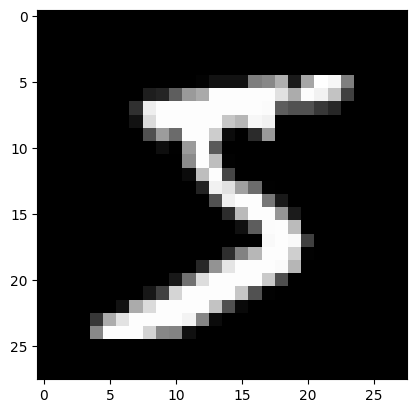

In [11]:
image, label = dataset[0]
plt.imshow(image,cmap='gray')
print('Label:',label)

Label: 1


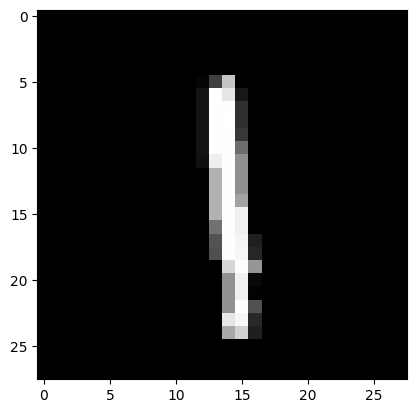

In [12]:
image, label = dataset[8]
plt.imshow(image,cmap='gray')
print("Label:",label)

In [13]:
import torchvision.transforms as transforms

In [15]:
dataset = MNIST(root='/data',train=True,download = True, transform = transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 52725124.18it/s]


Extracting /data/MNIST/raw/train-images-idx3-ubyte.gz to /data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1626593.80it/s]


Extracting /data/MNIST/raw/train-labels-idx1-ubyte.gz to /data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13322695.94it/s]


Extracting /data/MNIST/raw/t10k-images-idx3-ubyte.gz to /data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1613357.79it/s]

Extracting /data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /data/MNIST/raw



In [16]:
img_tensor,label = dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


In [17]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


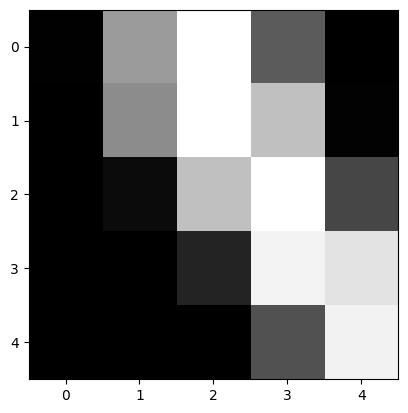

In [18]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

## Training and Validation Datasets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using gradient descent.
2. **Validation set** - used to evaluate the model during training, adjust hyperparameters (learning rate, etc.), and pick the best version of the model.
3. **Test set** - used to compare different models or approaches and report the model's final accuracy.

In the MNIST dataset, there are 60,000 training images and 10,000 test images. The test set is standardized so that different researchers can report their models' results against the same collection of images.

Since there's no predefined validation set, we must manually split the 60,000 images into training and validation datasets. Let's set aside 10,000 randomly chosen images for validation. We can do this using the `random_spilt` method from PyTorch.

In [19]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset,[50000,10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [20]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size,shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

## **Model**

In [21]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic Regression Model
model = nn.Linear(input_size,num_classes)

In [23]:
print(model.weight)

model.weight.shape

Parameter containing:
tensor([[ 0.0133, -0.0291, -0.0160,  ...,  0.0203, -0.0164, -0.0287],
        [ 0.0166,  0.0298,  0.0281,  ..., -0.0066, -0.0027, -0.0059],
        [ 0.0272,  0.0326,  0.0131,  ..., -0.0202, -0.0285, -0.0076],
        ...,
        [-0.0071,  0.0191, -0.0273,  ...,  0.0073, -0.0299,  0.0270],
        [ 0.0030, -0.0025, -0.0227,  ...,  0.0257,  0.0333, -0.0064],
        [ 0.0332, -0.0028, -0.0228,  ..., -0.0051, -0.0308,  0.0211]],
       requires_grad=True)


torch.Size([10, 784])

In [25]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0125,  0.0316, -0.0112, -0.0325, -0.0023,  0.0099,  0.0092,  0.0145,
         0.0328,  0.0099], requires_grad=True)

In [27]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size,num_classes)

  def forward(self,xb):
    xb = xb.reshape(-1,784)
    out = self.linear(xb)
    return out

model = MnistModel()

In [28]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 1.3939e-02,  1.6852e-03,  9.6147e-03,  ..., -2.2860e-04,
          -2.5549e-02, -6.6704e-03],
         [-3.1347e-02, -4.0304e-03, -2.3061e-02,  ..., -1.9236e-02,
          -2.5111e-05, -1.6769e-02],
         [ 1.9212e-02,  1.3678e-02, -1.8234e-02,  ..., -1.6443e-02,
          -3.0686e-03, -3.3126e-02],
         ...,
         [-1.9665e-02,  1.8929e-02, -1.7161e-02,  ..., -5.3972e-03,
           1.5729e-02,  1.4699e-02],
         [-1.5846e-02, -2.8911e-02,  2.5347e-02,  ..., -2.7045e-02,
          -4.3999e-03, -1.9382e-02],
         [ 7.9504e-03,  1.6979e-02, -1.3636e-02,  ...,  1.4768e-02,
          -3.0020e-02,  1.1556e-02]], requires_grad=True),
 Parameter containing:
 tensor([-0.0266,  0.0331,  0.0171, -0.0113, -0.0088,  0.0196, -0.0133,  0.0301,
          0.0348,  0.0016], requires_grad=True)]

In [30]:
for images, labels in train_loader:
  outputs = model(images)
  break;

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs.data)

outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.2096,  0.0581,  0.0190,  ..., -0.0605,  0.0254, -0.2985],
        [ 0.1706,  0.0746, -0.0815,  ...,  0.0357,  0.4766, -0.3375],
        [-0.0497,  0.1971,  0.1563,  ..., -0.0346,  0.1895, -0.2135],
        ...,
        [ 0.0073,  0.1950, -0.0305,  ..., -0.1329,  0.3285, -0.0917],
        [ 0.1616, -0.1787,  0.1241,  ..., -0.2841, -0.0748, -0.2621],
        [-0.0784,  0.1107,  0.0474,  ..., -0.0313,  0.1626, -0.0999]])


##**Converting to probabilities**

In [31]:
import torch.nn.functional as F

In [32]:
probs = F.softmax(outputs, dim = 1)

print("Sample probabilities:\n",probs[:2].data)

print("Sum",torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0840, 0.1097, 0.1055, 0.1133, 0.0902, 0.1243, 0.0925, 0.0975, 0.1062,
         0.0768],
        [0.1061, 0.0964, 0.0824, 0.1303, 0.1099, 0.0922, 0.0822, 0.0927, 0.1440,
         0.0638]])
Sum 0.9999999403953552


In [33]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([5, 8, 1, 3, 5, 3, 5, 8, 4, 5, 5, 5, 1, 1, 5, 6, 8, 5, 5, 5, 0, 8, 8, 1,
        3, 5, 3, 3, 1, 3, 1, 3, 6, 5, 5, 5, 1, 1, 4, 5, 5, 8, 8, 5, 5, 5, 5, 8,
        1, 5, 5, 8, 8, 6, 1, 8, 8, 5, 3, 5, 5, 8, 3, 3, 5, 3, 7, 1, 1, 3, 3, 8,
        1, 1, 3, 4, 8, 1, 1, 3, 1, 3, 3, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 6, 8, 5,
        4, 4, 1, 5, 3, 5, 0, 8, 5, 1, 5, 5, 1, 4, 5, 1, 3, 1, 4, 1, 5, 5, 3, 5,
        4, 5, 6, 5, 6, 8, 5, 5])
tensor([0.1243, 0.1440, 0.1163, 0.1441, 0.1259, 0.1215, 0.1200, 0.1468, 0.1229,
        0.1543, 0.1428, 0.1491, 0.1335, 0.1312, 0.1631, 0.1400, 0.1214, 0.1205,
        0.1259, 0.1606, 0.1135, 0.1559, 0.1404, 0.1298, 0.1430, 0.1404, 0.1308,
        0.1646, 0.1233, 0.1312, 0.1464, 0.1386, 0.1395, 0.1325, 0.1614, 0.1416,
        0.1369, 0.1573, 0.1456, 0.1294, 0.1724, 0.1403, 0.1196, 0.1569, 0.1440,
        0.1157, 0.1330, 0.1310, 0.1293, 0.1562, 0.1198, 0.1384, 0.1161, 0.1132,
        0.1349, 0.1195, 0.1120, 0.1210, 0.1343, 0.1291, 0.1277, 0.1325, 0.1430,
       

In [34]:
labels

tensor([1, 9, 9, 3, 4, 7, 1, 9, 0, 2, 6, 6, 7, 0, 8, 3, 6, 6, 4, 2, 7, 4, 8, 9,
        4, 5, 8, 8, 7, 5, 5, 8, 3, 9, 6, 9, 0, 5, 7, 1, 5, 9, 2, 6, 6, 9, 1, 4,
        9, 2, 0, 9, 7, 0, 9, 2, 3, 2, 5, 1, 9, 4, 0, 4, 1, 7, 1, 1, 7, 0, 3, 7,
        1, 3, 9, 0, 7, 1, 7, 3, 7, 9, 0, 3, 5, 6, 1, 0, 4, 1, 6, 5, 8, 3, 4, 8,
        4, 5, 7, 6, 8, 3, 6, 4, 1, 1, 6, 1, 5, 0, 2, 7, 0, 5, 0, 1, 3, 6, 6, 1,
        5, 7, 3, 6, 5, 7, 2, 5])

##**Evaluation Metric**

In [35]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [36]:
accuracy(outputs,labels)

tensor(0.1250)

In [37]:
loss_fn = F.cross_entropy

In [39]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2999, grad_fn=<NllLossBackward0>)


## **Training the model**

In [42]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):

        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses

        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies

        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()

In [43]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results

    for epoch in range(epochs):

        # Training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [44]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.2864561080932617, 'val_acc': 0.14151503145694733}

In [45]:
history1 = fit(5, 0.001, model, train_loader, val_loader)
history2 = fit(5, 0.001, model, train_loader, val_loader)
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9243, val_acc: 0.6285
Epoch [1], val_loss: 1.6643, val_acc: 0.7324
Epoch [2], val_loss: 1.4698, val_acc: 0.7654
Epoch [3], val_loss: 1.3224, val_acc: 0.7879
Epoch [4], val_loss: 1.2085, val_acc: 0.8015
Epoch [0], val_loss: 1.1187, val_acc: 0.8106
Epoch [1], val_loss: 1.0464, val_acc: 0.8171
Epoch [2], val_loss: 0.9871, val_acc: 0.8236
Epoch [3], val_loss: 0.9376, val_acc: 0.8266
Epoch [4], val_loss: 0.8957, val_acc: 0.8294
Epoch [0], val_loss: 0.8598, val_acc: 0.8333
Epoch [1], val_loss: 0.8286, val_acc: 0.8358
Epoch [2], val_loss: 0.8013, val_acc: 0.8381
Epoch [3], val_loss: 0.7771, val_acc: 0.8405
Epoch [4], val_loss: 0.7556, val_acc: 0.8436


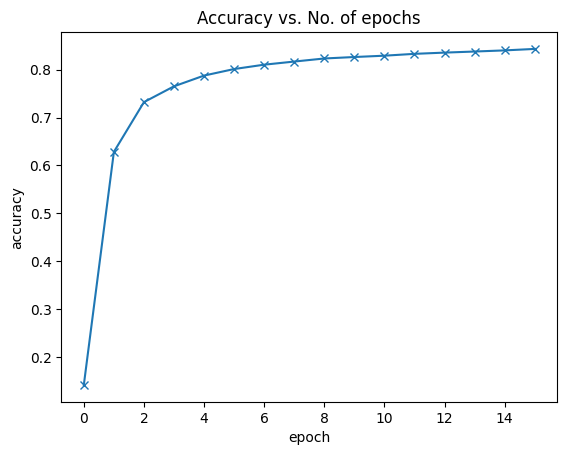

In [52]:
history = [result0] + history1 + history2 + history3
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');